In [15]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

In [16]:
# read in data
PATH_TO_WORKBOOK = Path("C:/Users/jmc010/UiT Office 365/O365-Pipette 2 - Documents/People/Marije")
EXCEL_WORKBOOK = "measurements_b3_1.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="metafile_niacin")


# how about a google drive but that we save a csv file for every day

In [17]:
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental':
        return 1
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 2
    elif row['sex'] == 'male' and row['group'] == 'experimental':
        return 3
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))

In [18]:
df.dtypes

animal_id            object
sex                category
group              category
diet               category
date                 object
niacin              float64
bodyweight          float64
food_yesterday      float64
food_today          float64
food_intake         float64
water_yesterday     float64
water_today          object
water_intake        float64
groupn                int64
dtype: object

In [19]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

In [20]:
df.animal_id.unique()
df.date.unique()

array(['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
       '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26'], dtype=object)

In [21]:
df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-12,0.0,20.4125,-1.0000,77.4500,-1.0000,-1.0000,-1.000000,0.0
1,female,control,2024-02-13,0.0,19.9375,77.4500,74.5625,2.8875,51.5000,9.012500,0.0
2,female,control,2024-02-14,0.0,20.0625,74.5625,71.6250,2.9375,51.2875,3.062500,0.0
3,female,control,2024-02-15,0.0,20.0875,71.6250,68.6375,2.9875,51.5250,3.000000,0.0
4,female,control,2024-02-16,0.0,20.2125,72.7875,69.4250,3.3625,51.7500,3.150000,0.0
5,female,control,2024-02-17,0.0,20.3000,69.4250,66.3125,3.1125,48.6000,3.150000,0.0
6,female,control,2024-02-18,0.0,20.4375,66.3125,63.1375,3.1750,45.4500,3.362500,0.0
7,female,control,2024-02-19,0.0,20.4000,63.1375,59.6375,3.5000,42.0875,3.425000,0.0
8,female,control,2024-02-20,0.0,20.8625,59.6375,56.3875,3.2500,38.6625,3.337500,0.0
9,female,control,2024-02-21,0.0,21.0500,56.3875,53.2500,3.1375,51.0875,2.900000,0.0


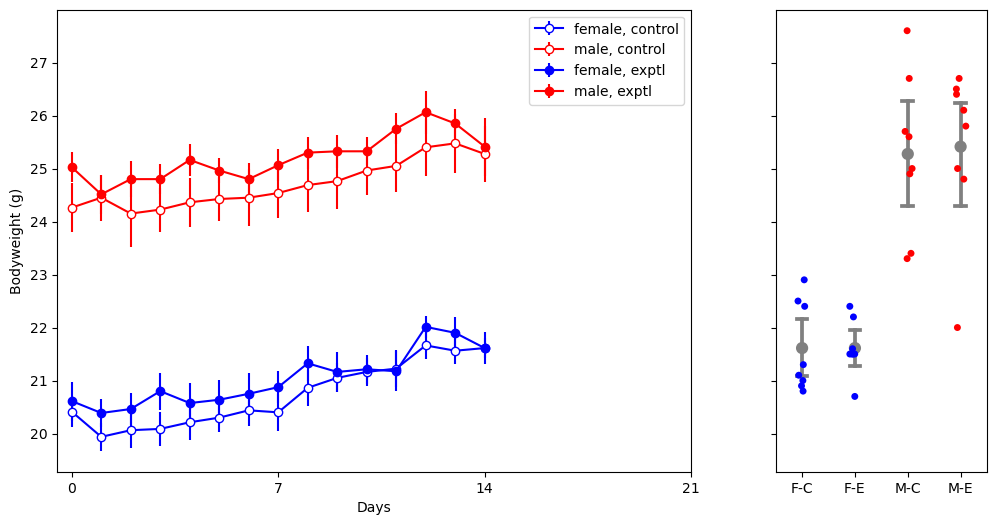

In [23]:
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

In [24]:
today_df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
448,B3101,male,control,control,2024-02-26,0.0,23.4,54.7,51.7,3.0,45.0,42.6,2.4,2
449,B3102,male,control,control,2024-02-26,0.0,24.9,52.6,50.3,2.3,44.0,40.9,3.1,2
450,B3103,male,experimental,experimental,2024-02-26,7.5,22.0,45.3,42.7,2.6,50.5,47.9,2.6,3
451,B3104,male,experimental,experimental,2024-02-26,7.5,25.0,30.8,28.0,2.8,51.5,49.1,2.4,3
452,B3105,male,control,control,2024-02-26,0.0,27.6,48.9,46.1,2.8,42.3,39.4,2.9,2
453,B3106,male,control,control,2024-02-26,0.0,26.7,45.5,42.9,2.6,43.0,40,3.0,2
454,B3107,male,experimental,experimental,2024-02-26,7.5,25.8,38.7,36.5,2.2,50.5,48.4,2.1,3
455,B3108,male,experimental,experimental,2024-02-26,7.5,26.5,41.9,39.2,2.7,50.7,48.7,2.0,3
456,B3109,male,control,control,2024-02-26,0.0,25.6,43.6,41.3,2.3,44.3,42,2.3,2
457,B3110,male,control,control,2024-02-26,0.0,25.7,41.8,39.7,2.1,44.3,42.1,2.2,2


In [25]:
today

'2024-02-26'

In [26]:
df.head()

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2


In [27]:
# Food intake figure

# Clean up df

def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: [x if x > 1 else np.nan for x in df_.food_intake])
            .assign(food_intake = lambda df_: [x if x < df_.food_intake.mean()*3 else np.nan for x in df_.food_intake])
            .assign(food_intake = lambda df_: [x if not np.isnan(x) else df_.food_intake.mean() for x in df_.food_intake])
            .assign(water_intake = lambda df_: [x if x > 1 else np.nan for x in df_.water_intake])
            .assign(water_intake = lambda df_: [x if x < df_.water_intake.mean()*2 else np.nan for x in df_.water_intake])
            .assign(water_intake = lambda df_: [x if not np.isnan(x) else df_.water_intake.mean() for x in df_.water_intake])
    )

df_food_water = remove_and_clean(df)


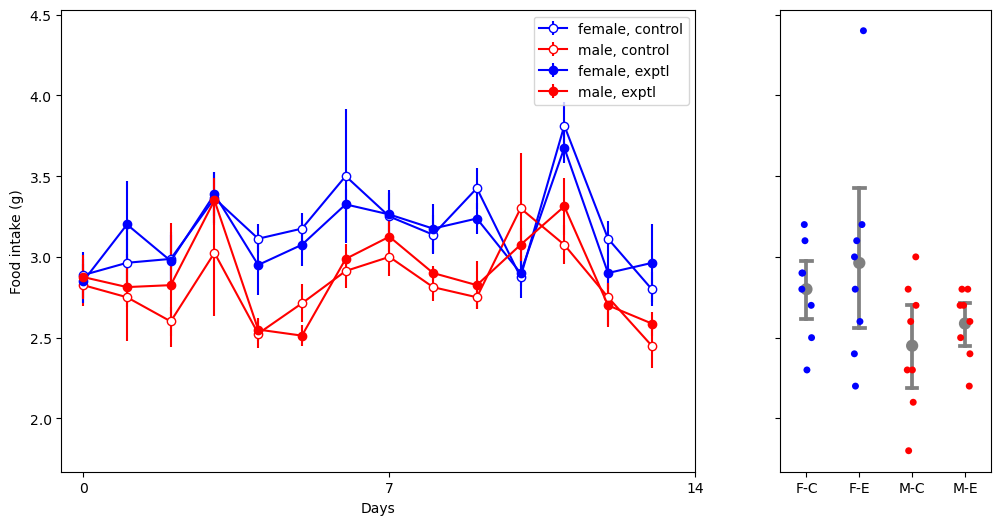

In [28]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,14])
ax[0].set_xticks([0,7,14])

#ax[0].set_ylim([0,4])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


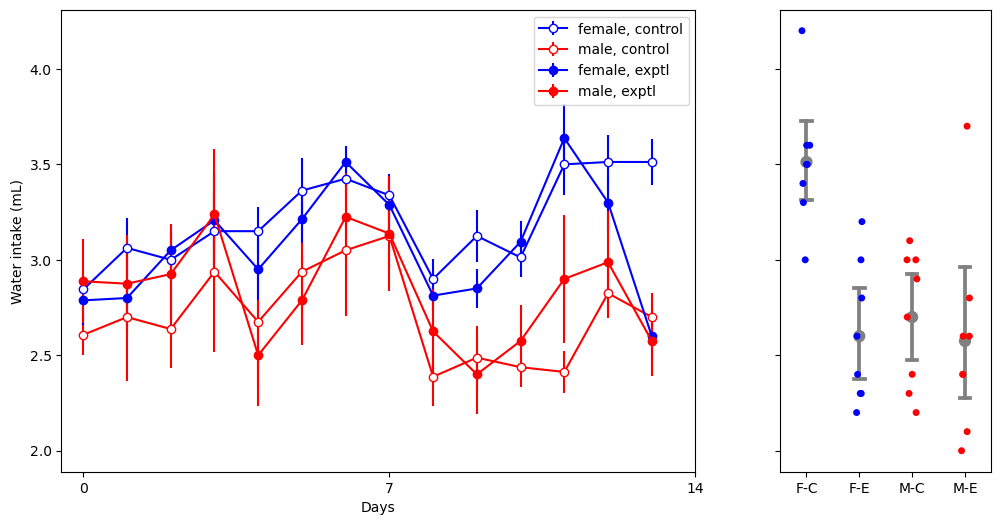

In [29]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,14])
ax[0].set_xticks([0,7,14])

# ax[0].set_ylim([0,4])

# Add labels
ax[0].set_ylabel("Water intake (mL)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (mL)")
ax[1].legend().remove()


In [41]:
f.show()

C:\Users\jmc010\AppData\Local\Temp\ipykernel_6380\1831071131.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


In [ ]:
# List of figures

# body weight graphs
# body weight of CON vs ND, male vs female
# bar graph and daily line graph
# most recent day change from last 3 days? (barscatter)


# food intake



# niacin concentration



#individual mice showing all on one graph